In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder



!pip install -Uq scikit-learn==1.3.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 63.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [2]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [4]:
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')


In [5]:
train_transaction.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_identity.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
# تحديد المسار
folder = '/kaggle/input/ieee-fraud-detection'

# تحميل ملفات test
test_trans = pd.read_csv(f'{folder}/test_transaction.csv')
test_id = pd.read_csv(f'{folder}/test_identity.csv')

# عرض شكل البيانات
test_trans.head(), test_id.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

(   TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
 0        3663549       18403224           31.95         W  10409  111.0   
 1        3663550       18403263           49.00         W   4272  111.0   
 2        3663551       18403310          171.00         W   4476  574.0   
 3        3663552       18403310          284.95         W  10989  360.0   
 4        3663553       18403317           67.95         W  18018  452.0   
 
    card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
 0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
 1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
 2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
 3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
 4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
 
    V336  V337  V338  V339  
 0   NaN   NaN   NaN   NaN  
 1   NaN   NaN

In [8]:
# نظرة سريعة على حجم البيانات
print("Transaction shape:", test_trans.shape)
print("Identity shape:", test_id.shape)

# نسبة القيم المفقودة في test_transaction
missing_trans = test_trans.isnull().mean().sort_values(ascending=False)
print("\nMissing values in test_transaction:")
print(missing_trans[missing_trans > 0][:10])  # أول 10 أعمدة فيها missing

# نسبة القيم المفقودة في test_identity
missing_id = test_id.isnull().mean().sort_values(ascending=False)
print("\nMissing values in test_identity:")
print(missing_id[missing_id > 0][:10])  # أول 10 أعمدة فيها missing

Transaction shape: (506691, 393)
Identity shape: (141907, 41)

Missing values in test_transaction:
dist2    0.928090
D7       0.881322
D12      0.863321
D8       0.853287
D9       0.853287
V138     0.850432
V158     0.850432
V157     0.850432
V156     0.850432
V155     0.850432
dtype: float64

Missing values in test_identity:
id-24    0.966598
id-25    0.964491
id-26    0.964434
id-21    0.964350
id-07    0.964350
id-08    0.964350
id-23    0.964329
id-22    0.964329
id-27    0.964329
id-18    0.641491
dtype: float64


In [9]:
# حذف الأعمدة اللي فيها missing values بنسبة أكتر من 90%
missing_ratio_trans = test_trans.isnull().mean()
missing_ratio_id = test_id.isnull().mean()

cols_to_drop_trans = missing_ratio_trans[missing_ratio_trans > 0.9].index
cols_to_drop_id = missing_ratio_id[missing_ratio_id > 0.9].index

test_trans = test_trans.drop(columns=cols_to_drop_trans)
test_id = test_id.drop(columns=cols_to_drop_id)

print("Remaining columns in test_transaction:", len(test_trans.columns))
print("Remaining columns in test_identity:", len(test_id.columns))

Remaining columns in test_transaction: 392
Remaining columns in test_identity: 32


In [10]:
# Fill NaNs in test_transaction
for col in test_trans.columns:
    if test_trans[col].dtype == 'object':
        test_trans[col] = test_trans[col].fillna('missing')
    else:
        test_trans[col] = test_trans[col].fillna(test_trans[col].mean())

# Fill NaNs in test_identity
for col in test_id.columns:
    if test_id[col].dtype == 'object':
        test_id[col] = test_id[col].fillna('missing')
    else:
        test_id[col] = test_id[col].fillna(test_id[col].mean())

print("✅ Missing values filled successfully.")

✅ Missing values filled successfully.


In [11]:
# first, we will explore the data for el training
# missing values
missing_values_count = train_transaction.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(train_transaction.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             8933
card3             1565
card4             1577
card5             4259
dtype: int64
% of missing data =  41.073431200111266


In [12]:
train = train_transaction.merge(train_identity, on='TransactionID', how='left')

In [13]:
test = test_trans.merge(test_id, on='TransactionID', how='left')

In [14]:

missing_percent = train.isnull().sum() / train.shape[0]
columns_to_drop = missing_percent[missing_percent > 0.90].index
train.drop(columns=columns_to_drop, axis=1, inplace=True)


In [15]:
# Fill remaining missing values with median
train_transaction = train_transaction.fillna(train_transaction.median(numeric_only=True))

In [16]:
del missing_values_count, total_cells, total_missing

In [17]:

def coorelation_analysis(cols,title='Coorelation Analysis',size=(12,12)):
    cols = sorted(cols)
    fig,axes = plt.subplots(1,1,figsize=size)
    df_corr = train_transaction[cols].corr()
    sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
    axes.title.set_text(title)
    plt.show()

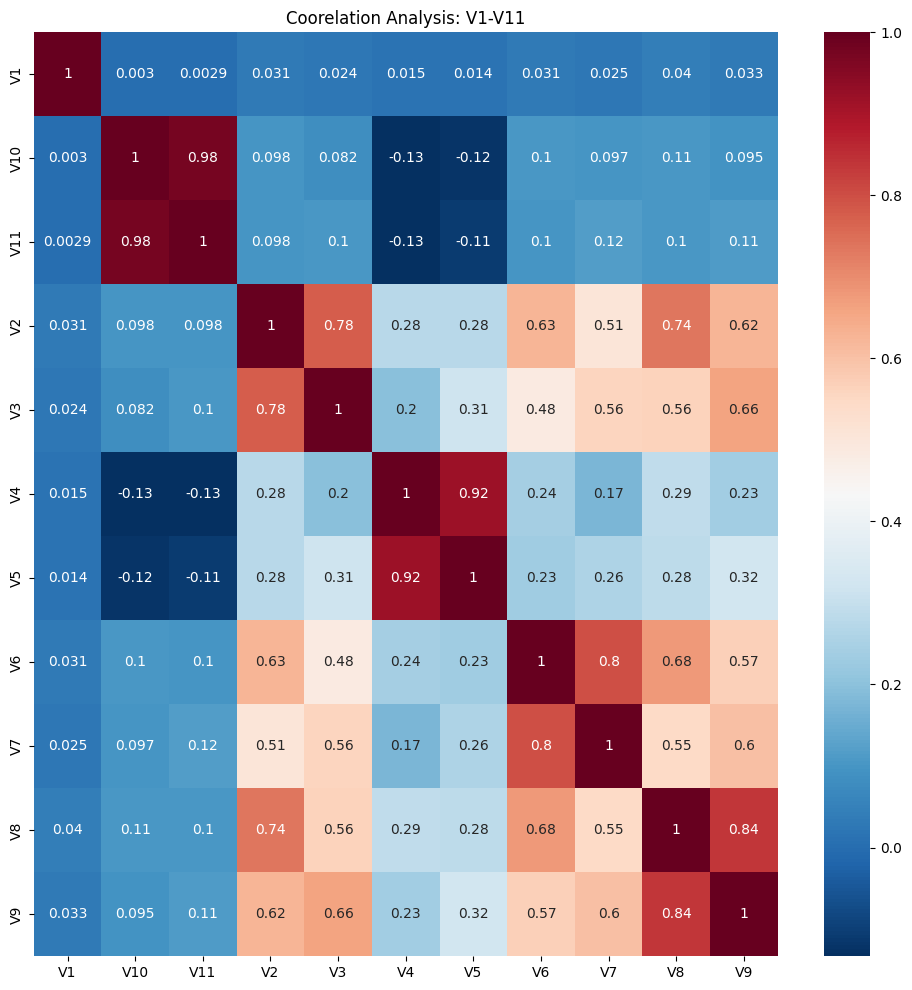

In [18]:
cols = ['V3', 'V9', 'V5', 'V11', 'V10', 'V8', 'V7', 'V6', 'V4', 'V2', 'V1']
coorelation_analysis(cols,title='Coorelation Analysis: V1-V11')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


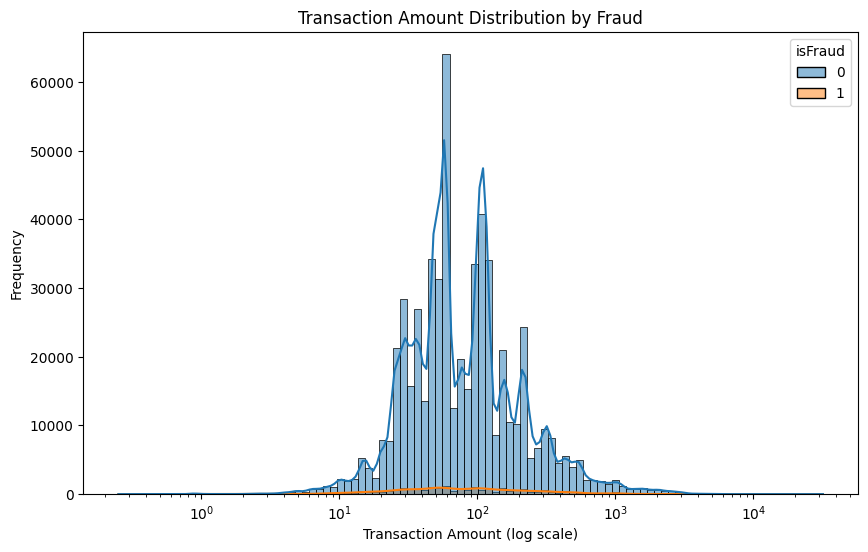

In [19]:
# Transaction Amount Distribution by Fraud (histogram) (Helps identify suspicious amount ranges.)
plt.figure(figsize=(10,6))
sns.histplot(data=train_transaction, x='TransactionAmt', hue='isFraud', bins=100, kde=True, log_scale=True)
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipykernel_13/2529875727.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_transaction['TransactionDT_Hour'] = (train_transaction['TransactionDT'] // 3600) % 24
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python

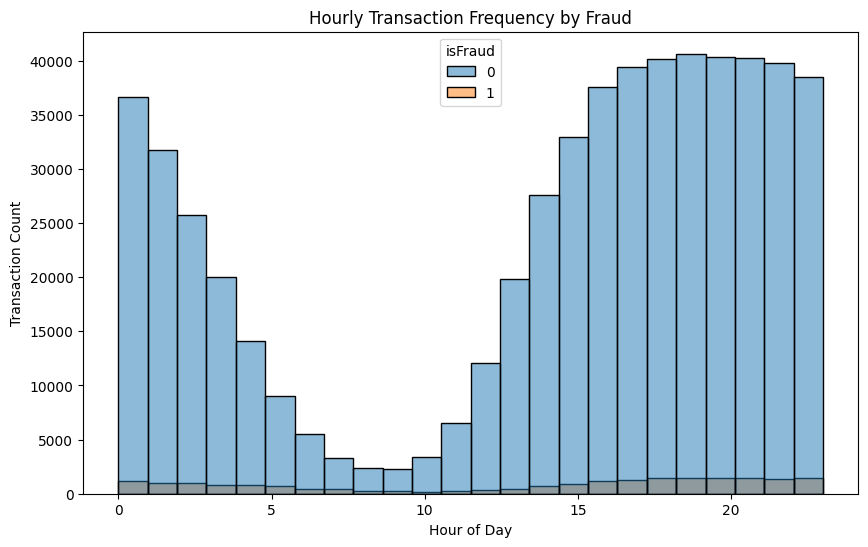

In [20]:
# Helps catch time-based fraud patterns.
train_transaction['TransactionDT_Hour'] = (train_transaction['TransactionDT'] // 3600) % 24
plt.figure(figsize=(10,6))
sns.histplot(data=train_transaction, x='TransactionDT_Hour', hue='isFraud', bins=24, kde=False)
plt.title("Hourly Transaction Frequency by Fraud")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()


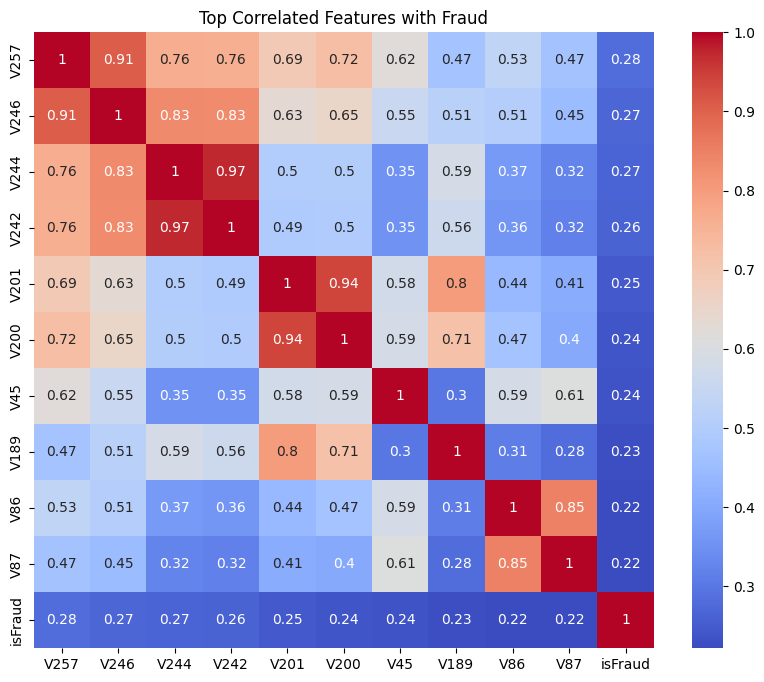

In [21]:
numeric_cols = train_transaction.select_dtypes(include=['number']).drop(columns=['isFraud']).corrwith(train_transaction['isFraud'])
top_features = numeric_cols.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,8))
sns.heatmap(train_transaction[top_features.tolist() + ['isFraud']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with Fraud")
plt.show()


In [22]:
 train = train.drop(['TransactionID', 'TransactionDT'], axis=1)  # Drop ID cols
train.fillna(-999, inplace=True)  # Fill missing values

In [23]:
test = test.drop(['TransactionID', 'TransactionDT'], axis=1)
test.fillna(-999, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode train and store encoders
cat_cols = train.select_dtypes(include='object').columns
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    encoders[col] = le 

# 2. Apply encoders to test
for col in cat_cols:
    if col in test.columns:
        test[col] = test[col].astype(str)
    else:
        test[col] = 'unknown'

    if col in encoders:
        le = encoders[col]

        # Handle unseen labels
        test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'unknown')

        if 'unknown' not in le.classes_:
            le.classes_ = np.append(le.classes_, 'unknown')

        test[col] = le.transform(test[col])
    else:
        test[col] = -999


In [25]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col].astype(str))
    return df


In [26]:

X = train.drop('isFraud', axis=1)
features = X.columns.tolist()

y = train['isFraud']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Random Forest model with balanced class weights to fix el data
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds_prob = rf_model.predict_proba(X_val)[:, 1]
rf_preds = rf_model.predict(X_val)

In [27]:
print("Random Forest ROC AUC:", roc_auc_score(y_val, rf_preds_prob))
print("Random Forest F1 Score:", f1_score(y_val, rf_preds))

Random Forest ROC AUC: 0.9328506454392701
Random Forest F1 Score: 0.573350836888743


In [28]:
# we will use lightgbm to boost el model 
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds_prob = lgb_model.predict_proba(X_val)[:, 1]
lgb_preds = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.203466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37788
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 418
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [29]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 64,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 10,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbosity': -1}

In [30]:
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [5, 10],
    'min_child_samples': [20, 50]
}


In [31]:
print("LightGBM ROC AUC:", roc_auc_score(y_val, lgb_preds_prob))
print("LightGBM F1 Score:", f1_score(y_val, lgb_preds))

LightGBM ROC AUC: 0.9315182439439534
LightGBM F1 Score: 0.3442280945757997


In [32]:
# next we will average the predicted prob. to reduce individual weaknesses and improve overall performance 
combined_preds_prob = (rf_preds_prob + lgb_preds_prob) / 2
combined_preds = (combined_preds_prob > 0.5).astype(int)

In [33]:
# These are arrays of predicted probabilities from each model
rf_preds_prob = rf_model.predict_proba(X_val)[:, 1]
lgb_preds_prob = lgb_model.predict_proba(X_val)[:, 1]


In [34]:
combined_preds_prob = (rf_preds_prob + lgb_preds_prob) / 2


In [35]:
# لو اكبر من ال 0.5 يبقى fraud لو اقل تبقى 0
combined_preds = (combined_preds_prob > 0.5).astype(int)

In [36]:
# evaluation finally
roc_auc_score(y_val, combined_preds_prob)
f1_score(y_val, combined_preds)


0.66163489829858

In [37]:

test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

# Step 2: Merge on TransactionID
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

 # Add missing columns (like id_01 to id_38) if they don't exist in test
for col in features:
    if col not in test.columns:
        test[col] = -999  # Or any default fill value used in training


In [38]:
# Add missing columns
missing_cols = set(features) - set(test.columns)
for col in missing_cols:
    test[col] = -999  

# Remove extra columns
extra_cols = set(test.columns) - set(features)
test = test.drop(columns=extra_cols)

# Ensure correct order
test = test[features]


In [39]:
X_test = test[features]
X_test = X_test.fillna(-999)


In [40]:
# Encode training data
X = label_encode(X)

# Encode test data (same features)
X_test = label_encode(X_test)


In [41]:

rf_model.fit(X, y)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
X_test = label_encode(X_test)
rf_model.predict_proba(X_test)


array([[0.97, 0.03],
       [0.98, 0.02],
       [0.97, 0.03],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.94, 0.06]])

In [43]:
# Get predicted probabilities
rf_test_probs = rf_model.predict_proba(X_test)[:, 1]
lgb_test_probs = lgb_model.predict_proba(X_test)[:, 1]

combined_test_probs = (rf_test_probs + lgb_test_probs) / 2



In [44]:
pd.DataFrame({'combined_probs': combined_test_probs[:10]})


,combined_probs
0,0.054905
1,0.087531
2,0.101016
3,0.034685
4,0.059579
5,0.051398
6,0.188696
7,0.286256
8,0.024578
9,0.103810


In [45]:
rf_test_probs = rf_model.predict_proba(X_test)[:, 1]
lgb_test_probs = lgb_model.predict_proba(X_test)[:, 1]
combined_test_probs = (rf_test_probs + lgb_test_probs) / 2

submission = pd.DataFrame({
    'TransactionID': test_transaction['TransactionID'],
    'isFraud': combined_test_probs
})


In [46]:
submission.head()


,TransactionID,isFraud
0,3663549,0.054905
1,3663550,0.087531
2,3663551,0.101016
3,3663552,0.034685
4,3663553,0.059579


In [47]:
submission.to_csv("submission.csv", index=False)


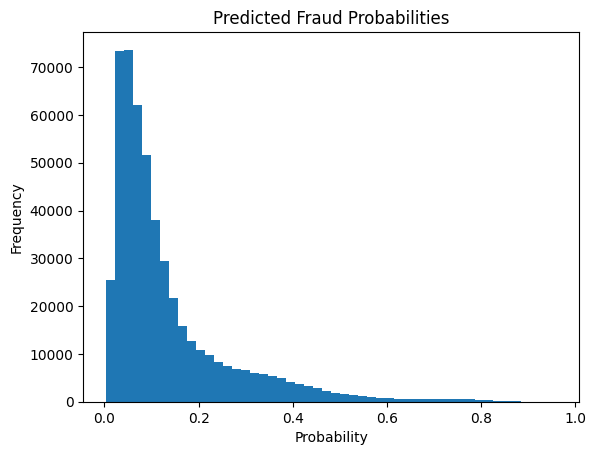

In [48]:
import matplotlib.pyplot as plt

plt.hist(combined_test_probs, bins=50)
plt.title("Predicted Fraud Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()
